# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [15]:
# Imports
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [65]:
a = 2323.23213
print(round(a,2))


2323.23


In [16]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [17]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica

print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [18]:
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [19]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df["espécies"] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [21]:
help(pd.Categorical.from_codes)

Help on method from_codes in module pandas.core.arrays.categorical:

from_codes(codes, categories, ordered=False) method of builtins.type instance
    Make a Categorical type from codes and categories arrays.
    
    This constructor is useful if you already have codes and categories and
    so do not need the (computation intensive) factorization step, which is
    usually done on the constructor.
    
    If your data does not follow this convention, please use the normal
    constructor.
    
    Parameters
    ----------
    codes : array-like, integers
        An integer array, where each integer points to a category in
        categories or -1 for NaN
    categories : index-like
        The categories for the categorical. Items need to be unique.
    ordered : boolean, (default False)
        Whether or not this categorical is treated as a ordered
        categorical. If not given, the resulting categorical will be
        unordered.



In [22]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df["target"] = iris.target

In [23]:
# Extraia as features (atributos) do dataset e imprima 
features = df.columns[:4]
print(features)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [33]:
# Calcule a média de cada feature para as 3 classes
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [27]:
help(pd.groupby)

Help on function groupby in module pandas.core.api:

groupby(*args, **kwargs)



## Exploração de Dados

In [9]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)


In [35]:
df.head(20).T# funcao T para traspor uma tabela

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,3.8,3.8
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3
espécies,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2

In [39]:
# Faça um resumo estatístico do dataset
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [12]:
# Verifique se existem valores nulos no dataset
df.isnull().sum(axis=0)


In [13]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].value_counts(dropna=False)

## Plot

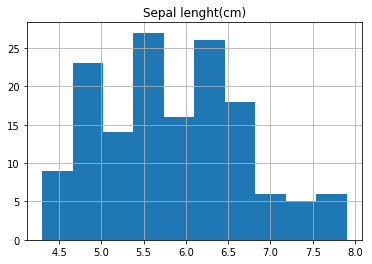

In [48]:
# Crie um Histograma de sepal length
df['sepal length (cm)'].hist(bins =10)
plt.title("Sepal lenght(cm)")#colocando um titulo para o histograma
plt.show() # pritnar o histograma 

In [15]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target


In [16]:
# Crie um Scatter Plot de 2 Features (atributos)


In [17]:
# Crie um Scatter Matrix das Features (atributos)


In [18]:
# Crie um Histograma de todas as features
